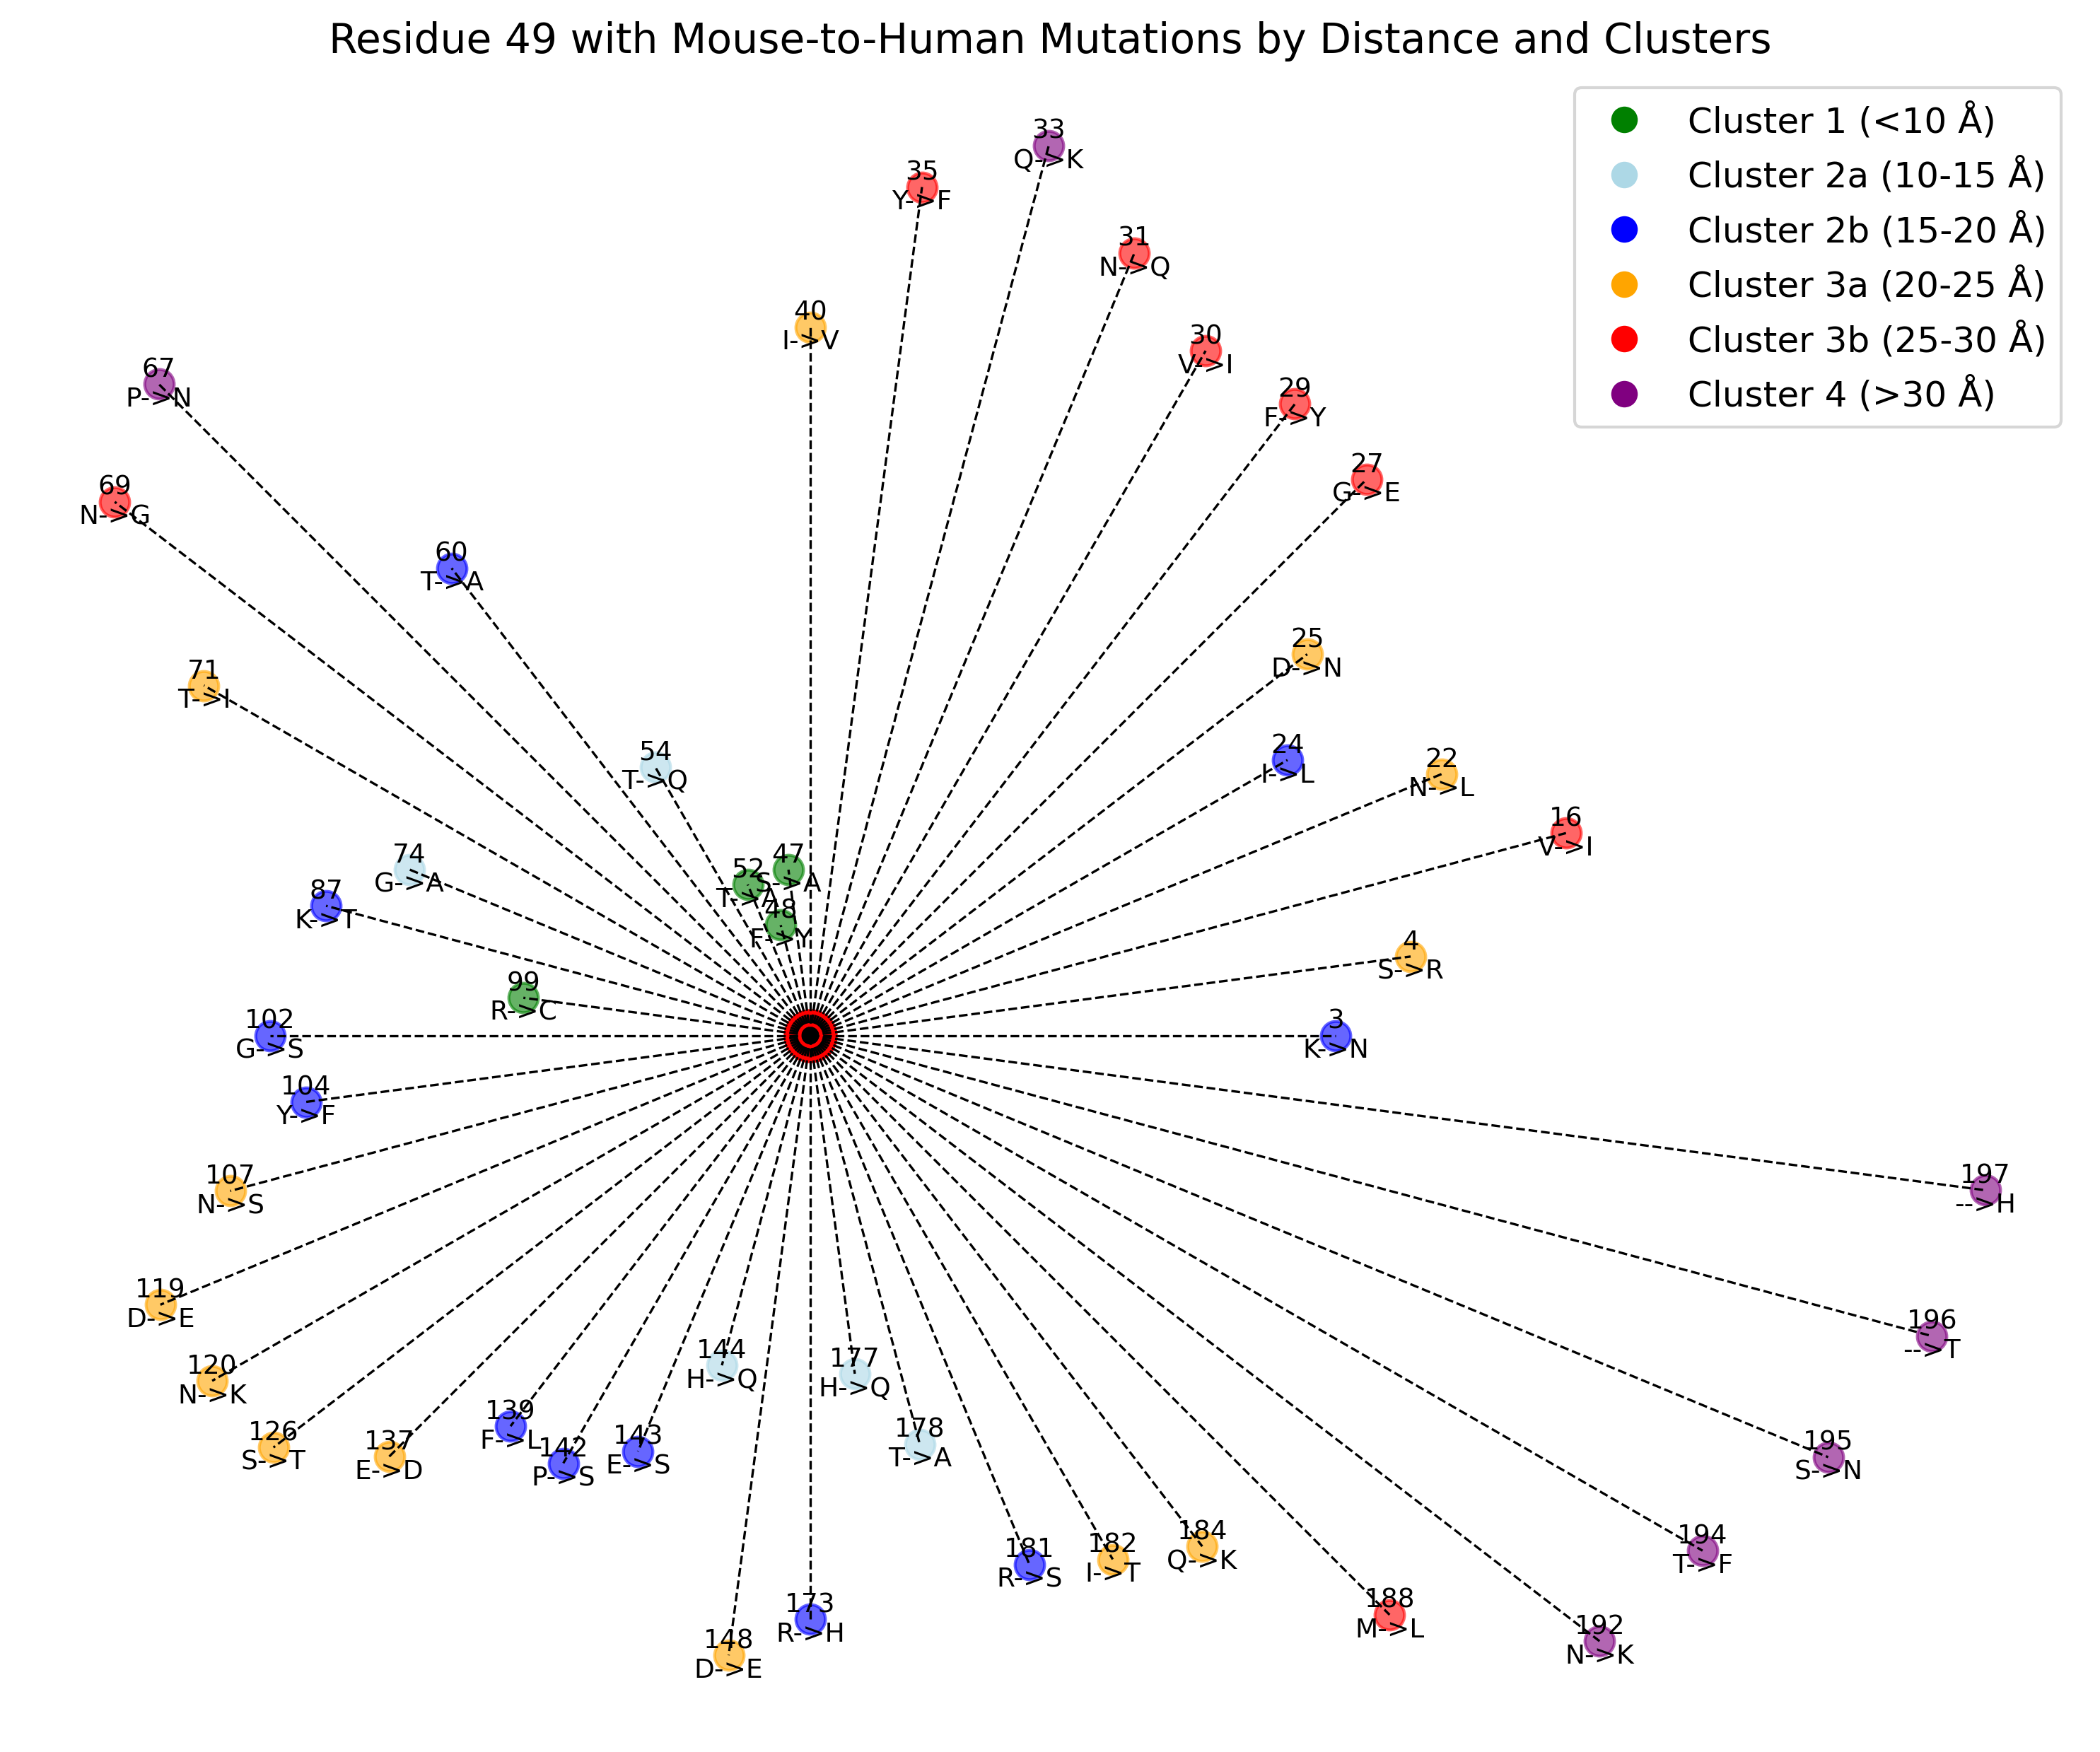

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Residue distances with Mouse as reference (Position, Mouse Cys, Human Cys, Distance in Å)
residues = [
    (3, 'K', 'N', 17.66), (4, 'S', 'R', 20.34), (16, 'V', 'I', 26.28),
    (22, 'N', 'L', 22.95), (24, 'I', 'L', 18.51), (25, 'D', 'N', 21.04),
    (27, 'G', 'E', 26.43), (29, 'F', 'Y', 26.74), (30, 'V', 'I', 26.56),
    (31, 'N', 'Q', 28.45), (33, 'Q', 'K', 30.95), (35, 'Y', 'F', 28.75),
    (40, 'I', 'V', 23.80), (47, 'S', 'A', 5.62), (48, 'F', 'Y', 3.84),
    (52, 'T', 'A', 5.49), (54, 'T', 'Q', 10.42), (60, 'T', 'A', 19.79),
    (67, 'P', 'N', 30.95), (69, 'N', 'G', 29.45), (71, 'T', 'I', 23.52),
    (74, 'G', 'A', 14.58), (87, 'K', 'T', 16.84), (99, 'R', 'C', 9.72),
    (102, 'G', 'S', 18.15), (104, 'Y', 'F', 17.08), (107, 'N', 'S', 20.17),
    (119, 'D', 'E', 23.63), (120, 'N', 'K', 23.20), (126, 'S', 'T', 22.73),
    (137, 'E', 'D', 20.00), (139, 'F', 'L', 16.54), (142, 'P', 'S', 16.59),
    (143, 'E', 'S', 15.12), (144, 'H', 'Q', 11.47), (148, 'D', 'E', 21.00),
    (173, 'R', 'H', 19.61), (177, 'H', 'Q', 11.46), (178, 'T', 'A', 14.21),
    (181, 'R', 'S', 19.23), (182, 'I', 'T', 20.32), (184, 'Q', 'K', 21.63),
    (188, 'M', 'L', 27.52), (192, 'N', 'K', 33.42), (194, 'T', 'F', 34.61),
    (195, 'S', 'N', 37.01), (196, '-', 'T', 39.01), (197, '-', 'H', 39.81)
]

# Angles for plotting circular layout
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)

# Save path for the figure
save_path = '/home/hp/nayanika/github/GPX6/figures/Residue_mouse_Distances.png'

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_aspect('equal')

# Plot residue 49 at the center (red circle)
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1', 'green'
    elif 10 <= dist < 15:
        return 'Cluster 2a', 'lightblue'
    elif 15 <= dist < 20:
        return 'Cluster 2b', 'blue'
    elif 20 <= dist < 25:
        return 'Cluster 3a', 'orange'
    elif 25 <= dist < 30:
        return 'Cluster 3b', 'red'
    else:
        return 'Cluster 4', 'purple'

# Plot residues around the center based on distances
for i, (residue, mouse, human, dist) in enumerate(residues):
    # Get cluster information
    cluster_label, color = get_cluster(dist)

    # Calculate x and y coordinates1
    x = dist * np.cos(angles[i])
    y = dist * np.sin(angles[i])

    # Plot circles for residues
    ax.scatter(x, y, s=100, color=color, label=cluster_label if i == 0 else "", alpha=0.6)

    # Annotate residue transformations (Mouse -> Human)
    ax.text(x, y, f"{residue}\n{mouse}->{human}", fontsize=9, ha='center', va='center')

    # Draw a line from the center to each residue
    ax.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.8)

# Create cluster legend
cluster_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 1 (<10 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Cluster 2a (10-15 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2b (15-20 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Cluster 3a (20-25 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 3b (25-30 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 4 (>30 Å)')
]
ax.legend(handles=cluster_handles, loc='upper right', fontsize=12)

# Set plot title
ax.set_title('Residue 49 with Mouse-to-Human Mutations by Distance and Clusters', fontsize=14)

# Remove axes for better visualization
ax.axis('off')

# Tight layout and save the figure
plt.tight_layout()
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show plot (optional)
plt.show()


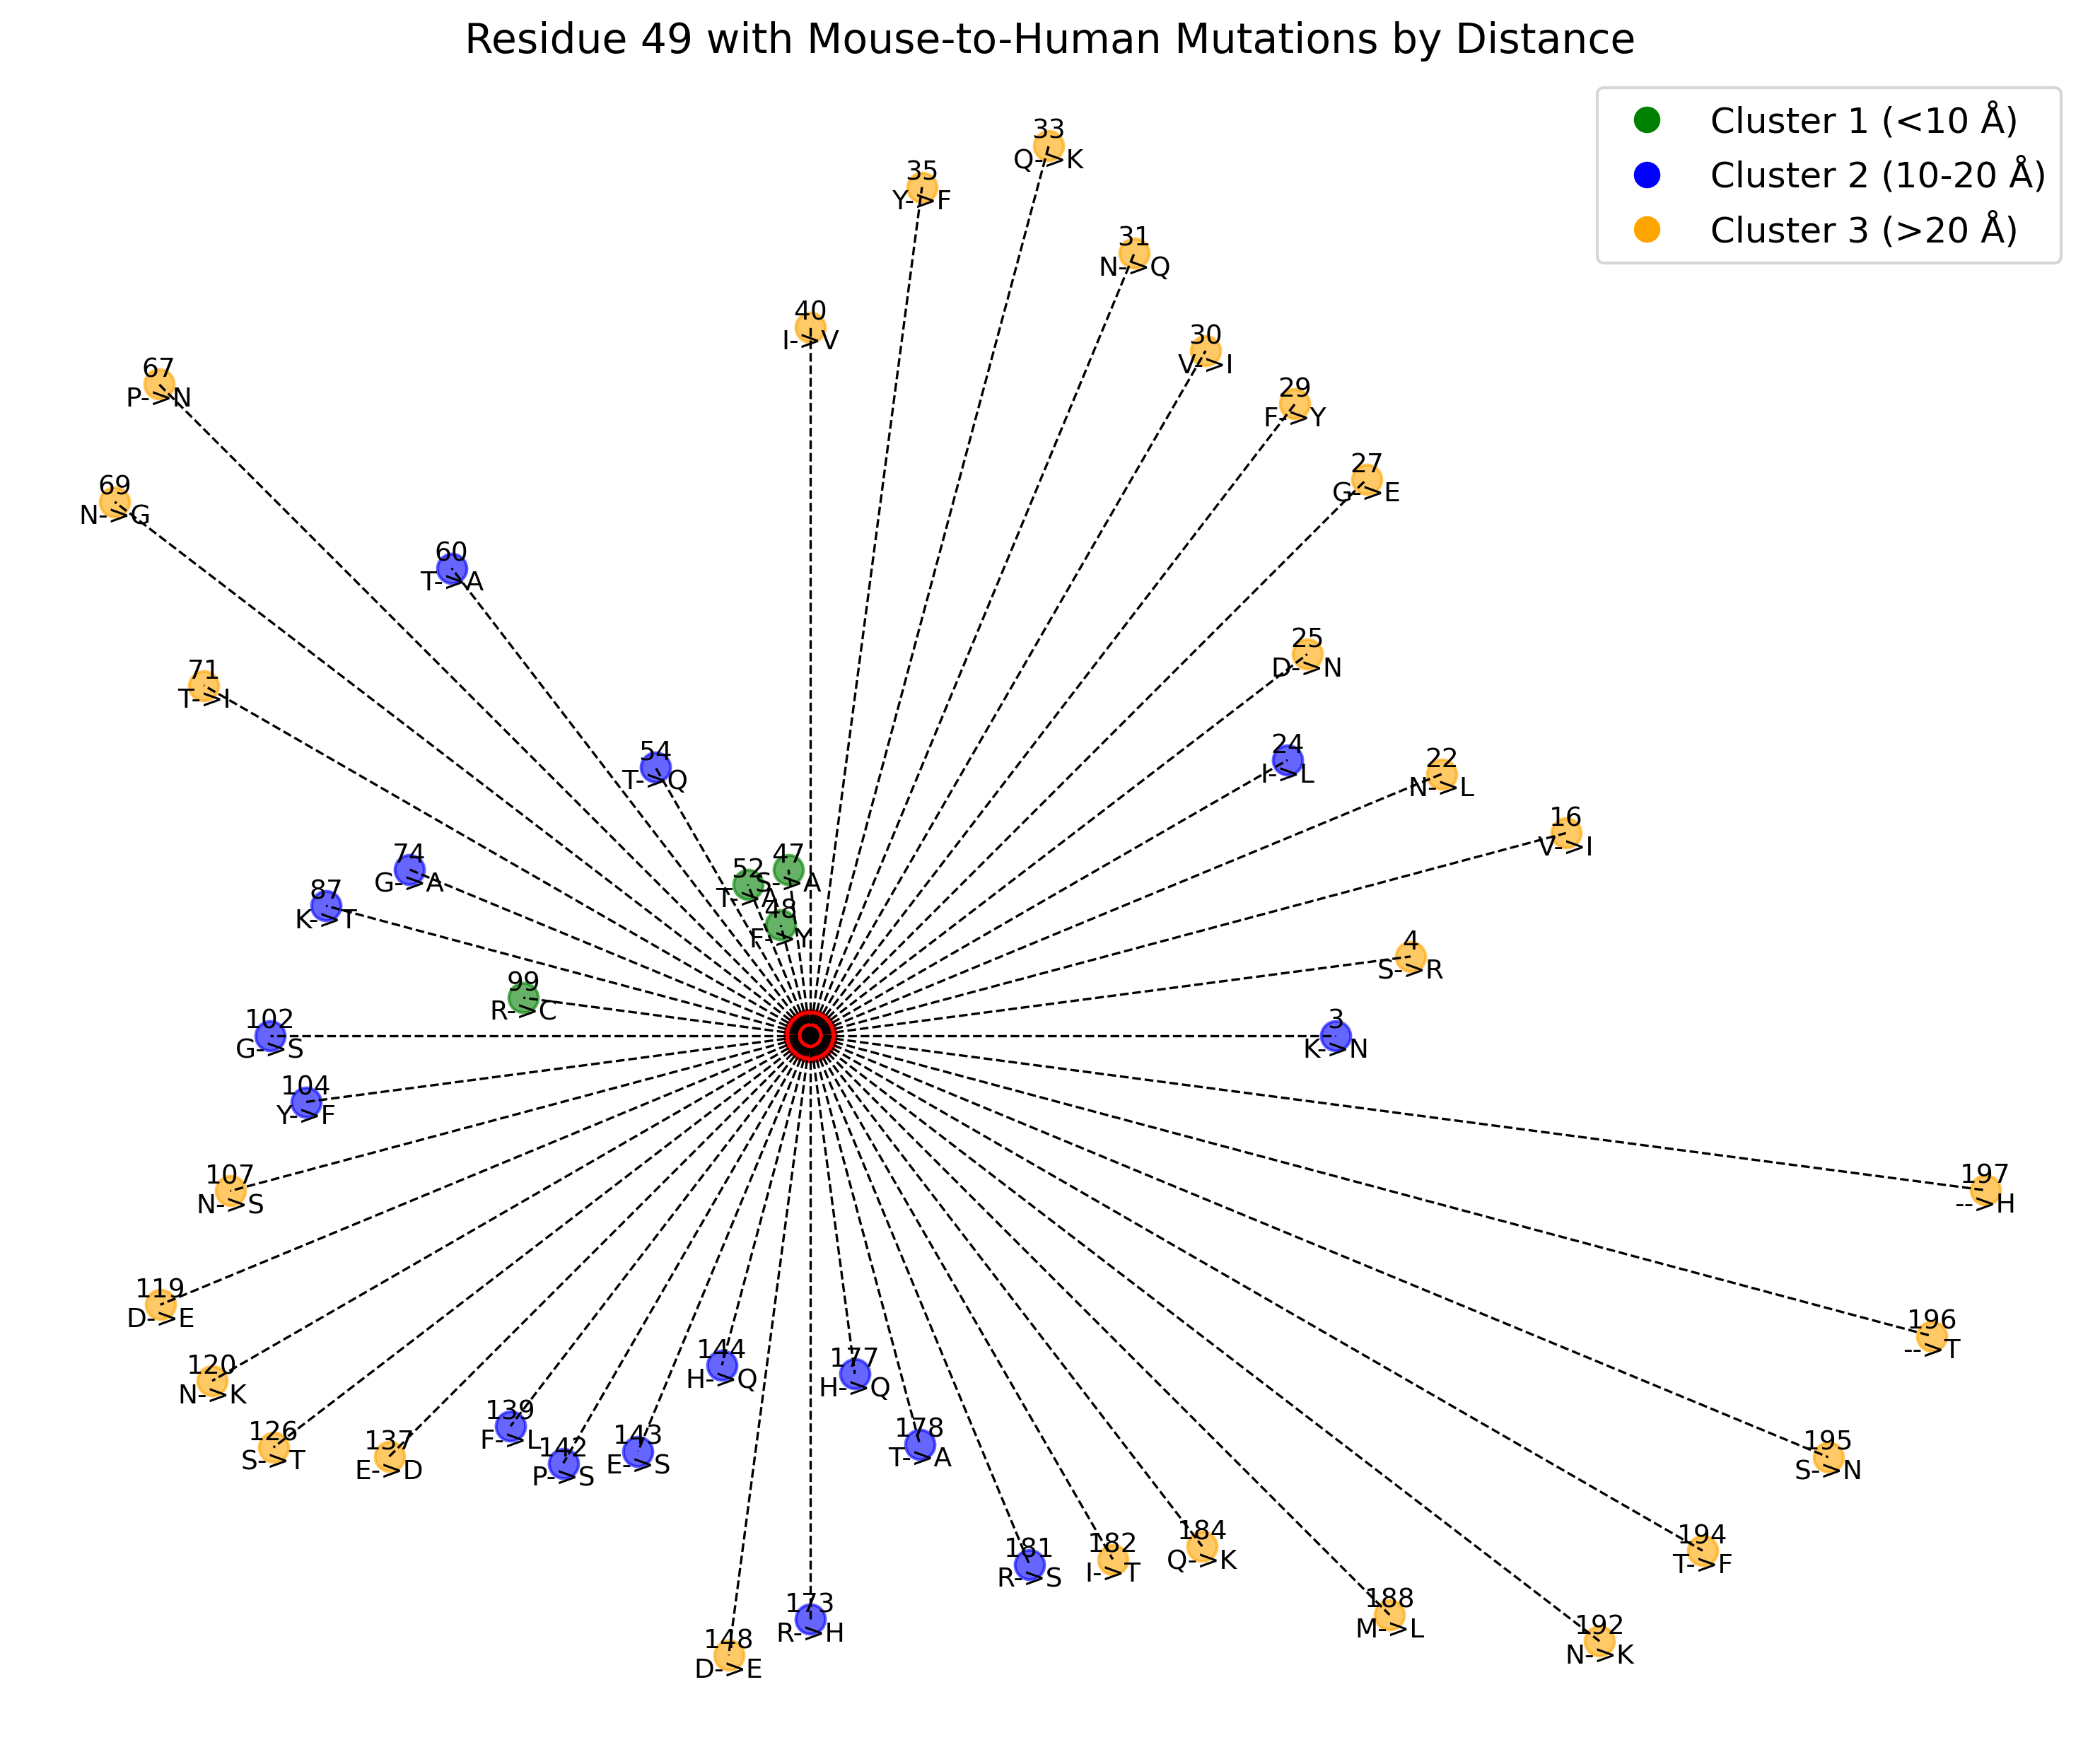

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Residue distances with Mouse as reference (Position, Mouse Cys, Human Cys, Distance in Å)
residues = [
    (3, 'K', 'N', 17.66), (4, 'S', 'R', 20.34), (16, 'V', 'I', 26.28),
    (22, 'N', 'L', 22.95), (24, 'I', 'L', 18.51), (25, 'D', 'N', 21.04),
    (27, 'G', 'E', 26.43), (29, 'F', 'Y', 26.74), (30, 'V', 'I', 26.56),
    (31, 'N', 'Q', 28.45), (33, 'Q', 'K', 30.95), (35, 'Y', 'F', 28.75),
    (40, 'I', 'V', 23.80), (47, 'S', 'A', 5.62), (48, 'F', 'Y', 3.84),
    (52, 'T', 'A', 5.49), (54, 'T', 'Q', 10.42), (60, 'T', 'A', 19.79),
    (67, 'P', 'N', 30.95), (69, 'N', 'G', 29.45), (71, 'T', 'I', 23.52),
    (74, 'G', 'A', 14.58), (87, 'K', 'T', 16.84), (99, 'R', 'C', 9.72),
    (102, 'G', 'S', 18.15), (104, 'Y', 'F', 17.08), (107, 'N', 'S', 20.17),
    (119, 'D', 'E', 23.63), (120, 'N', 'K', 23.20), (126, 'S', 'T', 22.73),
    (137, 'E', 'D', 20.00), (139, 'F', 'L', 16.54), (142, 'P', 'S', 16.59),
    (143, 'E', 'S', 15.12), (144, 'H', 'Q', 11.47), (148, 'D', 'E', 21.00),
    (173, 'R', 'H', 19.61), (177, 'H', 'Q', 11.46), (178, 'T', 'A', 14.21),
    (181, 'R', 'S', 19.23), (182, 'I', 'T', 20.32), (184, 'Q', 'K', 21.63),
    (188, 'M', 'L', 27.52), (192, 'N', 'K', 33.42), (194, 'T', 'F', 34.61),
    (195, 'S', 'N', 37.01), (196, '-', 'T', 39.01), (197, '-', 'H', 39.81)
]

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1', 'green'
    elif 10 <= dist < 20:
        return 'Cluster 2', 'blue'
    else:
        return 'Cluster 3', 'orange'

# Convert polar to Cartesian coordinates based on distance only
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)
x = [dist * np.cos(angle) for dist, angle in zip([r[3] for r in residues], angles)]
y = [dist * np.sin(angle) for dist, angle in zip([r[3] for r in residues], angles)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_aspect('equal')

# Plot residues based on distance
for i, (residue, mouse, human, dist) in enumerate(residues):
    cluster_label, color = get_cluster(dist)
    ax.scatter(x[i], y[i], s=100, color=color, alpha=0.6, label=cluster_label if i == 0 else "")
    ax.text(x[i], y[i], f"{residue}\n{mouse}->{human}", fontsize=9, ha='center', va='center')
    ax.plot([0, x[i]], [0, y[i]], color='black', linestyle='--', linewidth=0.8)

# Plot central residue
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Create cluster legend
cluster_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 1 (<10 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2 (10-20 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Cluster 3 (>20 Å)')
]
ax.legend(handles=cluster_handles, loc='upper right', fontsize=12)

# Set title and remove axes
ax.set_title('Residue 49 with Mouse-to-Human Mutations by Distance', fontsize=14)
ax.axis('off')

# Save figure
save_path = '/home/hp/nayanika/github/GPX6/figures/Residue_mouse_Distances.png'
plt.tight_layout()
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show plot
plt.show()


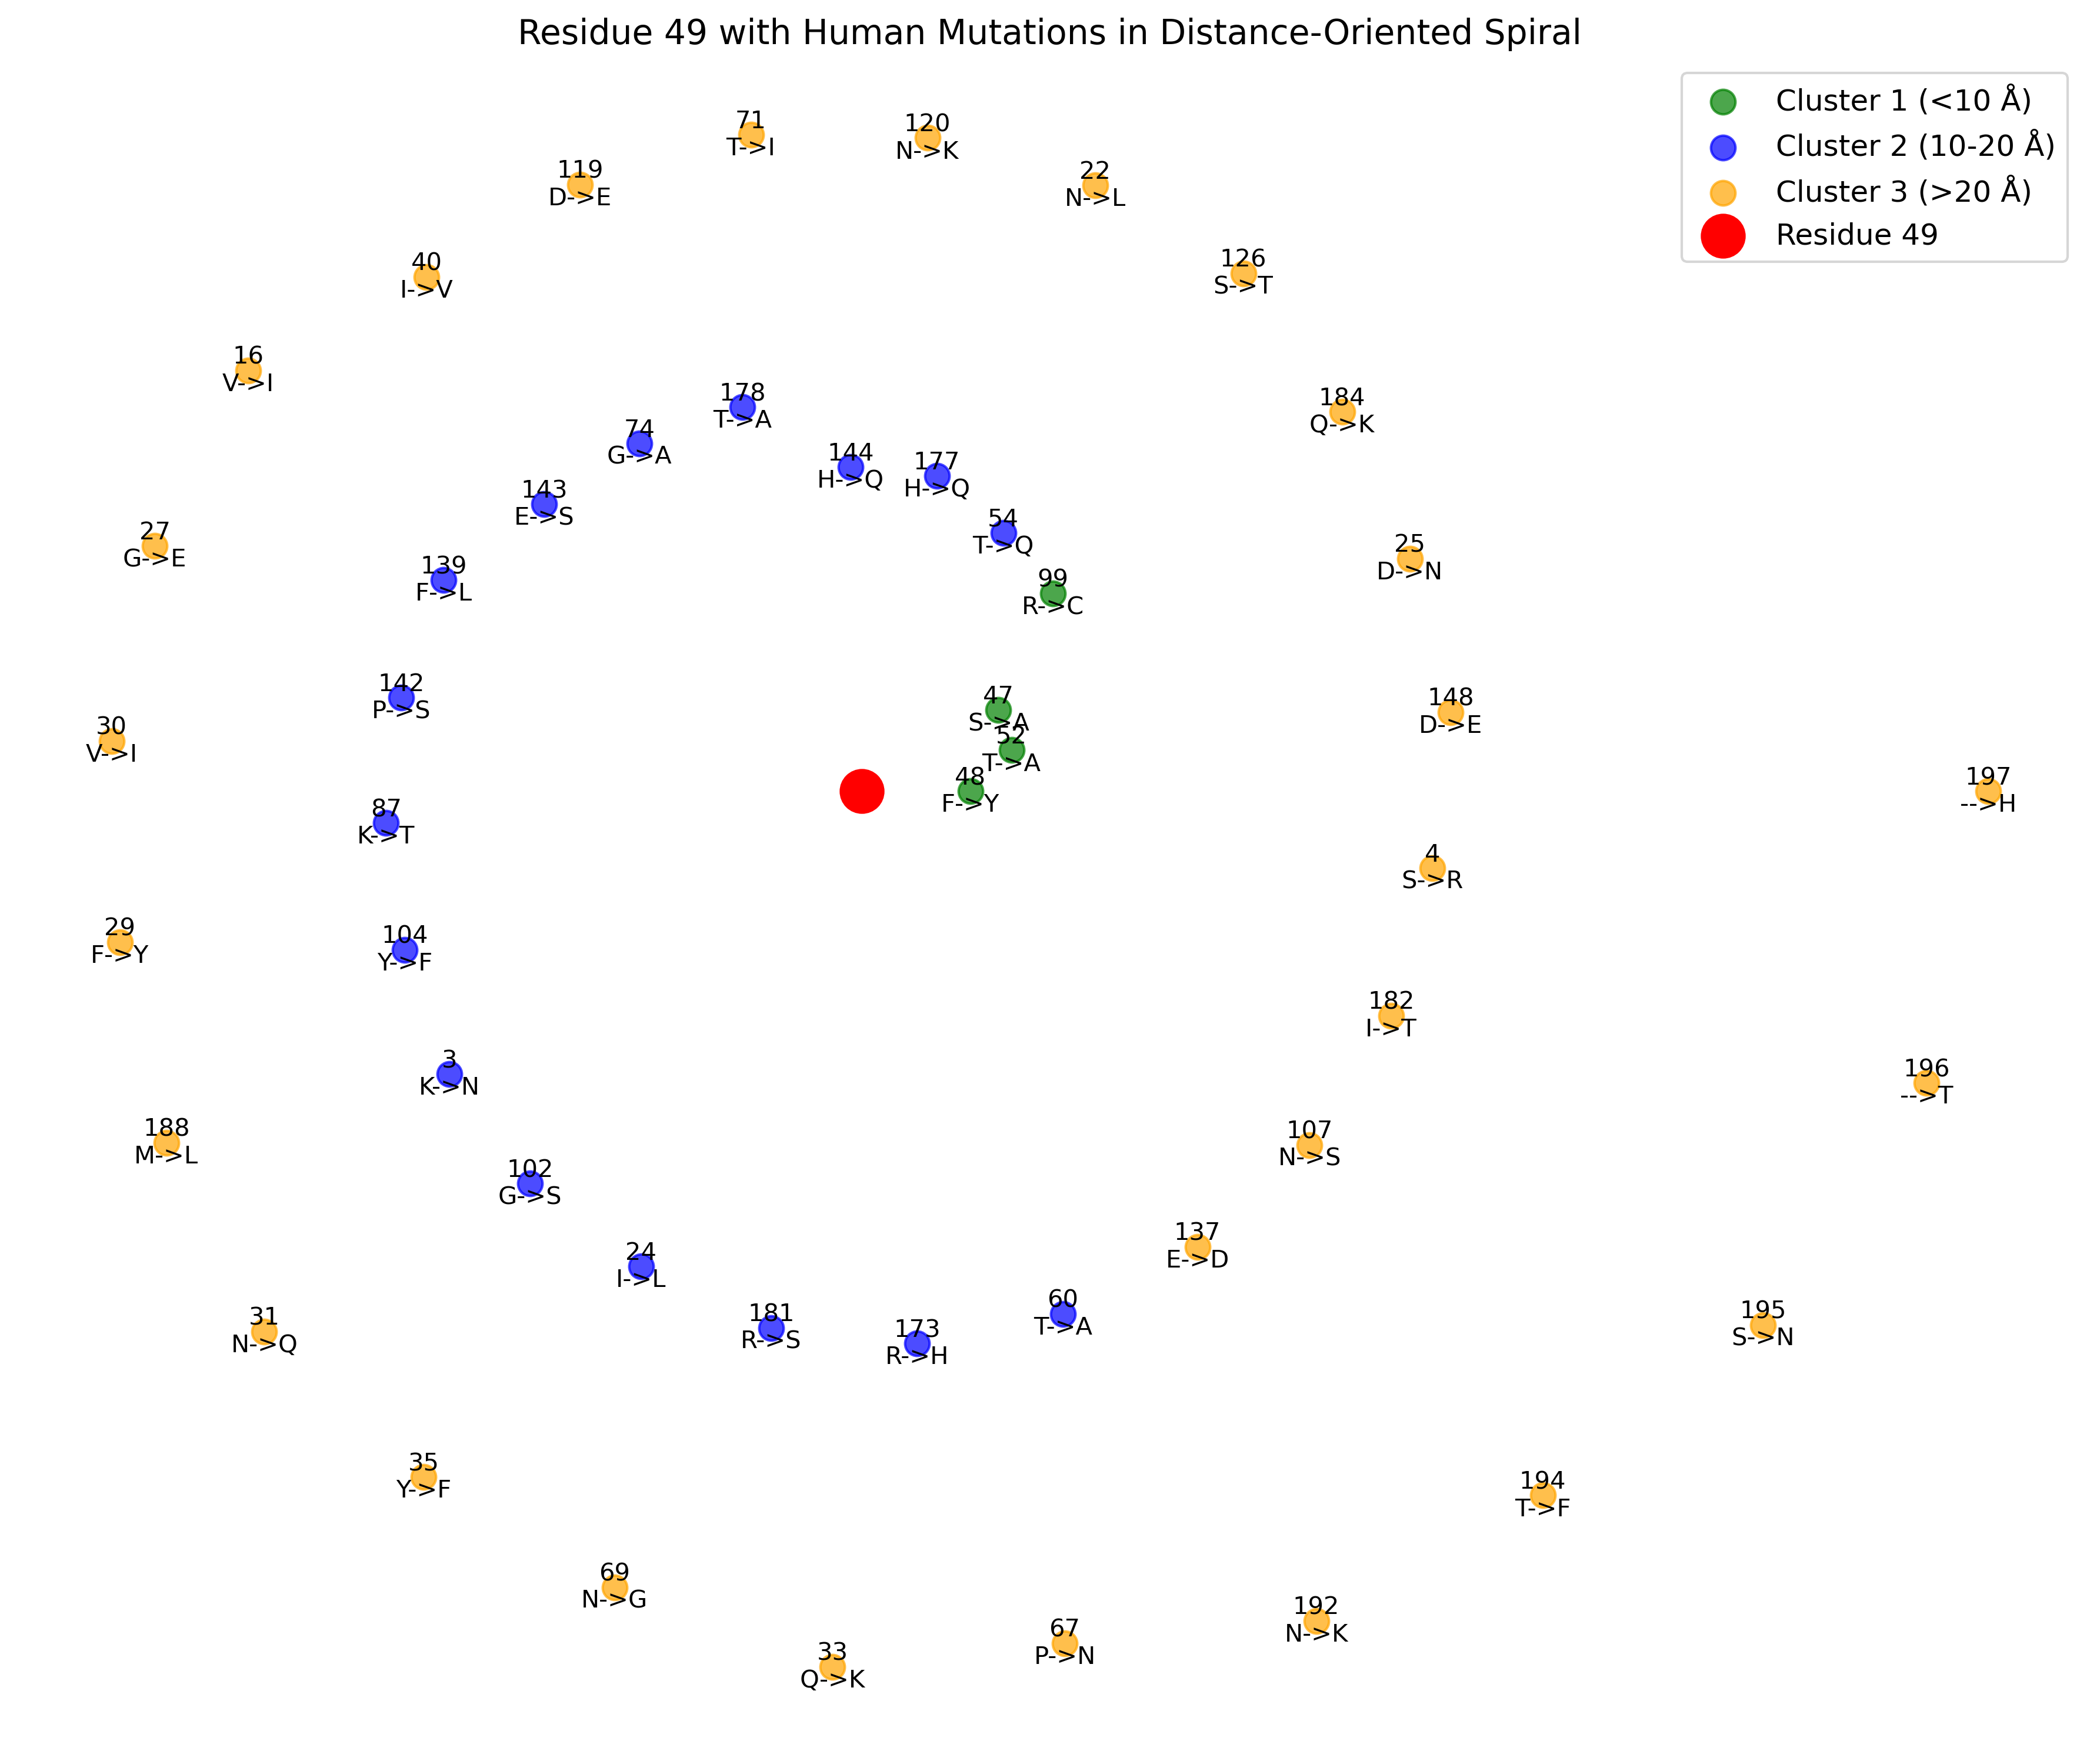

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Residue distances with Mouse as reference (Position, Mouse Cys, Human Cys, Distance in Å)
residues = [
    (3, 'K', 'N', 17.66), (4, 'S', 'R', 20.34), (16, 'V', 'I', 26.28),
    (22, 'N', 'L', 22.95), (24, 'I', 'L', 18.51), (25, 'D', 'N', 21.04),
    (27, 'G', 'E', 26.43), (29, 'F', 'Y', 26.74), (30, 'V', 'I', 26.56),
    (31, 'N', 'Q', 28.45), (33, 'Q', 'K', 30.95), (35, 'Y', 'F', 28.75),
    (40, 'I', 'V', 23.80), (47, 'S', 'A', 5.62), (48, 'F', 'Y', 3.84),
    (52, 'T', 'A', 5.49), (54, 'T', 'Q', 10.42), (60, 'T', 'A', 19.79),
    (67, 'P', 'N', 30.95), (69, 'N', 'G', 29.45), (71, 'T', 'I', 23.52),
    (74, 'G', 'A', 14.58), (87, 'K', 'T', 16.84), (99, 'R', 'C', 9.72),
    (102, 'G', 'S', 18.15), (104, 'Y', 'F', 17.08), (107, 'N', 'S', 20.17),
    (119, 'D', 'E', 23.63), (120, 'N', 'K', 23.20), (126, 'S', 'T', 22.73),
    (137, 'E', 'D', 20.00), (139, 'F', 'L', 16.54), (142, 'P', 'S', 16.59),
    (143, 'E', 'S', 15.12), (144, 'H', 'Q', 11.47), (148, 'D', 'E', 21.00),
    (173, 'R', 'H', 19.61), (177, 'H', 'Q', 11.46), (178, 'T', 'A', 14.21),
    (181, 'R', 'S', 19.23), (182, 'I', 'T', 20.32), (184, 'Q', 'K', 21.63),
    (188, 'M', 'L', 27.52), (192, 'N', 'K', 33.42), (194, 'T', 'F', 34.61),
    (195, 'S', 'N', 37.01), (196, '-', 'T', 39.01), (197, '-', 'H', 39.81)
]

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1 (<10 Å)', 'green'
    elif 10 <= dist < 20:
        return 'Cluster 2 (10-20 Å)', 'blue'
    else:
        return 'Cluster 3 (>20 Å)', 'orange'

# Sort residues by distance to correctly position them in spiral
residues_sorted = sorted(residues, key=lambda x: x[3])

# Calculate angle for each residue based on sorted index
angles = np.linspace(0, 4 * np.pi, len(residues_sorted))  # Multiple turns

# Use actual distance values for radial placement
radii = [residue[3] for residue in residues_sorted]  # Distance-based positioning

x = [r * np.cos(angle) for r, angle in zip(radii, angles)]
y = [r * np.sin(angle) for r, angle in zip(radii, angles)]

# Create figure
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
ax.set_aspect('equal')

# Track used labels to prevent duplicate legends
used_labels = set()

# Plot residues based on distance-oriented spiral
for i, (residue, mouse, human, dist) in enumerate(residues_sorted):
    cluster_label, color = get_cluster(dist)
    
    # Add label only if not already used
    if cluster_label not in used_labels:
        ax.scatter(x[i], y[i], s=100, color=color, alpha=0.7, label=cluster_label)
        used_labels.add(cluster_label)
    else:
        ax.scatter(x[i], y[i], s=100, color=color, alpha=0.7)

    # Add residue label with larger font size (increase fontsize)
    ax.text(x[i], y[i], f"{residue}\n{mouse}->{human}", 
            fontsize=10, ha='center', va='center')

# Plot central residue
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Create cluster legend
ax.legend(loc='upper right', fontsize=12)

# Set title and remove axes
ax.set_title('Residue 49 with Human Mutations in Distance-Oriented Spiral', fontsize=14)
ax.axis('off')

# Save figure
save_path = '/home/hp/nayanika/github/GPX6/figures/Residue_human_Distance_Spiral.png'
plt.tight_layout()
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show plot
plt.show()


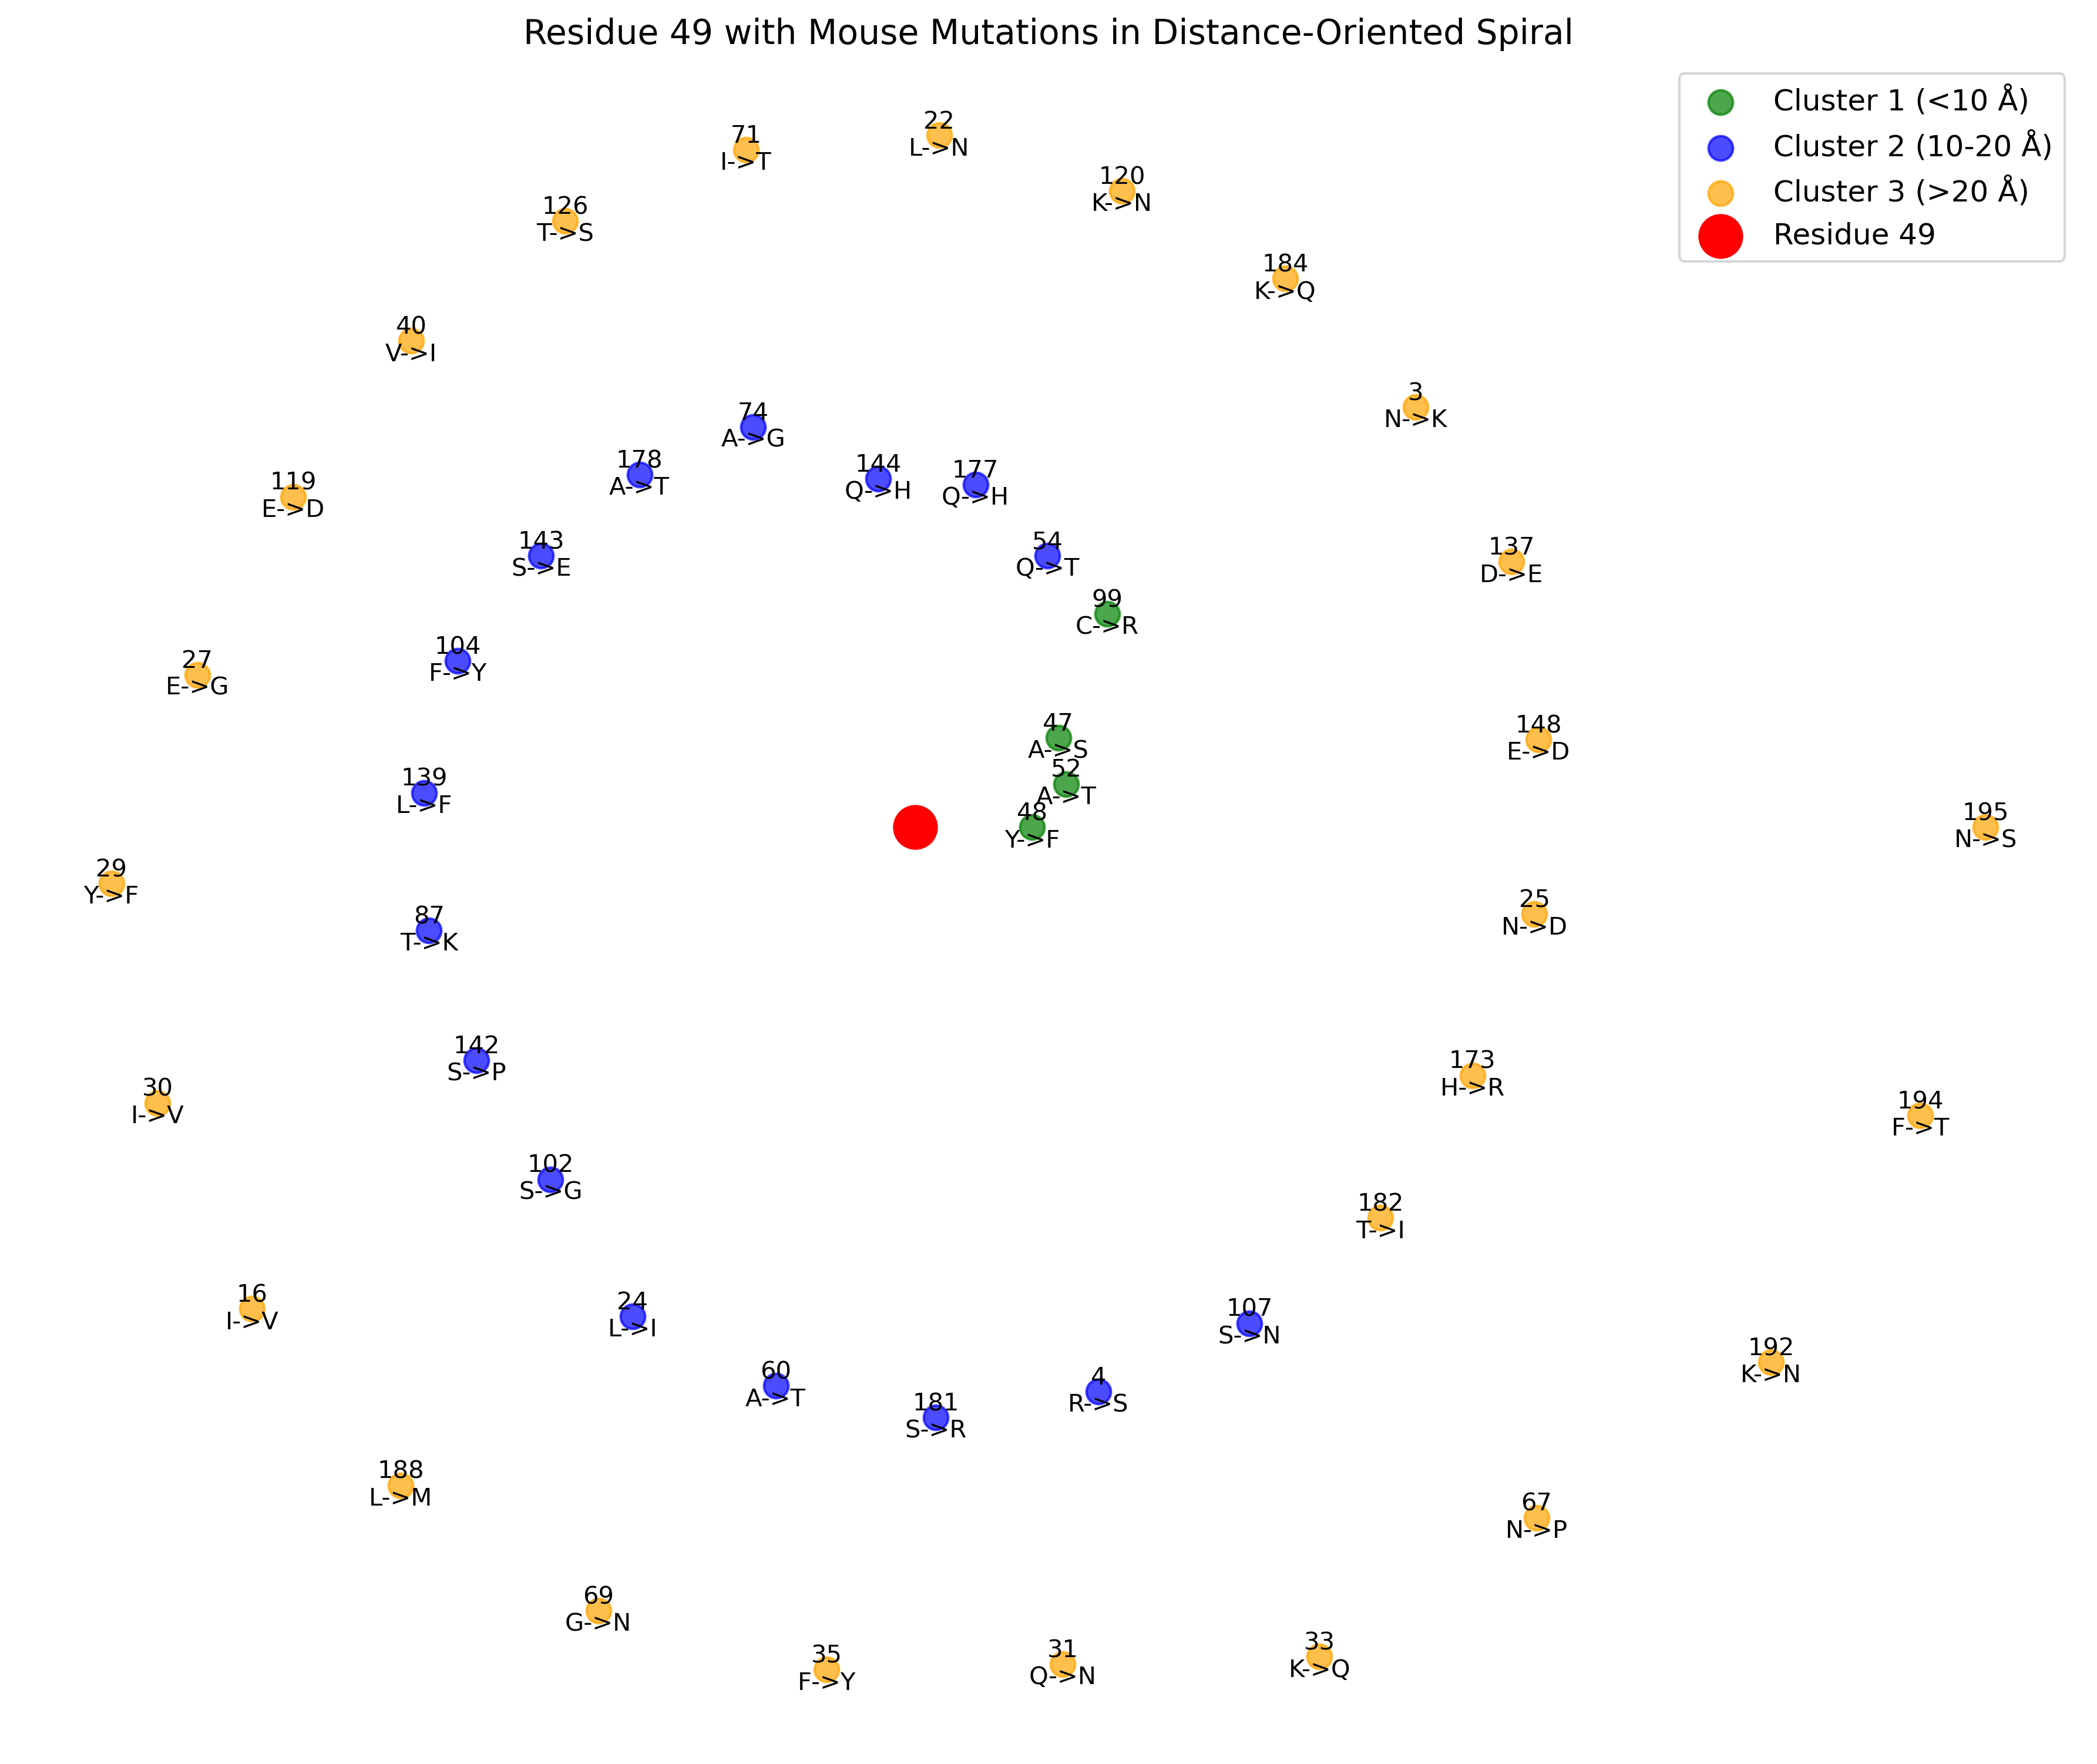

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Residue distances with Mouse as reference (Position, Mouse Cys, Human Cys, Distance in Å)
residues = [
    (3, 'N', 'K', 21.63), (4, 'R', 'S', 19.64), (16, 'I', 'V', 27.12),
    (22, 'L', 'N', 22.91), (24, 'L', 'I', 18.69), (25, 'N', 'D', 20.70),
    (27, 'E', 'G', 24.28), (29, 'Y', 'F', 26.66), (30, 'I', 'V', 26.67),
    (31, 'Q', 'N', 28.12), (33, 'K', 'Q', 30.54), (35, 'F', 'Y', 28.03),
    (40, 'V', 'I', 23.17), (47, 'A', 'S', 5.59), (48, 'Y', 'F', 3.88),
    (52, 'A', 'T', 5.20), (54, 'Q', 'T', 10.00), (60, 'A', 'T', 19.05),
    (67, 'N', 'P', 30.74), (69, 'G', 'N', 27.97), (71, 'I', 'T', 23.11),
    (74, 'A', 'G', 14.29), (87, 'T', 'K', 16.44), (99, 'C', 'R', 9.50),
    (102, 'S', 'G', 16.77), (104, 'F', 'Y', 16.10), (107, 'S', 'N', 19.80),
    (119, 'E', 'D', 23.30), (120, 'K', 'N', 22.14), (126, 'T', 'S', 23.16),
    (137, 'D', 'E', 21.60), (139, 'L', 'F', 16.28), (142, 'S', 'P', 16.44),
    (143, 'S', 'E', 15.29), (144, 'Q', 'H', 11.60), (148, 'E', 'D', 20.84),
    (173, 'H', 'R', 20.19), (177, 'Q', 'H', 11.51), (178, 'A', 'T', 14.81),
    (181, 'S', 'R', 19.54), (182, 'T', 'I', 20.11), (184, 'K', 'Q', 21.90),
    (188, 'L', 'M', 27.64), (192, 'K', 'N', 33.41), (194, 'F', 'T', 34.61),
    (195, 'N', 'S', 35.43)
]

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1 (<10 Å)', 'green'
    elif 10 <= dist < 20:
        return 'Cluster 2 (10-20 Å)', 'blue'
    else:
        return 'Cluster 3 (>20 Å)', 'orange'

# Sort residues by distance to correctly position them in spiral
residues_sorted = sorted(residues, key=lambda x: x[3])

# Calculate angle for each residue based on sorted index
angles = np.linspace(0, 4 * np.pi, len(residues_sorted))  # Multiple turns

# Use actual distance values for radial placement
radii = [residue[3] for residue in residues_sorted]  # Distance-based positioning

x = [r * np.cos(angle) for r, angle in zip(radii, angles)]
y = [r * np.sin(angle) for r, angle in zip(radii, angles)]

# Create figure
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
ax.set_aspect('equal')

# Track used labels to prevent duplicate legends
used_labels = set()

# Plot residues based on distance-oriented spiral
for i, (residue, mouse, human, dist) in enumerate(residues_sorted):
    cluster_label, color = get_cluster(dist)
    
    # Add label only if not already used
    if cluster_label not in used_labels:
        ax.scatter(x[i], y[i], s=100, color=color, alpha=0.7, label=cluster_label)
        used_labels.add(cluster_label)
    else:
        ax.scatter(x[i], y[i], s=100, color=color, alpha=0.7)

    # Add residue label with larger font size (increase fontsize)
    ax.text(x[i], y[i], f"{residue}\n{mouse}->{human}", 
            fontsize=10, ha='center', va='center')

# Plot central residue
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Create cluster legend
ax.legend(loc='upper right', fontsize=12)

# Set title and remove axes
ax.set_title('Residue 49 with Mouse Mutations in Distance-Oriented Spiral', fontsize=14)
ax.axis('off')

# Save figure
save_path = '/home/hp/nayanika/github/GPX6/figures/Residue_mouse_Distance_Spiral.png'
plt.tight_layout()
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show plot
plt.show()
